In [15]:
import data_retrieval_utils as dru
import matplotlib.pyplot as plt
import pandas as pd
from run_dict import RUN_DICT, ML_ONLY_ALG, OCSVM_DEFAULT, OCSVM_SMALL_GAMMA, OCSVM_SMALLEST_GAMMA, OCSVM_LARGE_GAMMA
import xarray as xr

In [16]:
max_time = 160
time_sl = slice("2020-01-19", "2020-03-30")
table_run_names = {
    ML_ONLY_ALG: r"ML-corrected $g_{\mathrm{Tquv}}$",
    OCSVM_SMALLEST_GAMMA: r"ND ML $g_{\mathrm{Tquv}}, \eta_{\mathrm{Tq, OCSVM}}, \gamma=\frac{1}{79}$",
    OCSVM_SMALL_GAMMA: r"ND ML $g_{\mathrm{Tquv}}, \eta_{\mathrm{Tq, OCSVM}}, \gamma=\frac{2}{79}$",
    OCSVM_DEFAULT: r"ND ML $g_{\mathrm{Tquv}}, \eta_{\mathrm{Tq, OCSVM}}, \gamma=\frac{4}{79}$",
    OCSVM_LARGE_GAMMA: r"ND ML $g_{\mathrm{Tquv}}, \eta_{\mathrm{Tq, OCSVM}}, \gamma=\frac{8}{79}$",
}
runs = {name: RUN_DICT[name] for name in table_run_names}

In [17]:
diags_complete = dru.get_diags_complete_downloaded(runs)

In [18]:
explosion_ds = xr.concat(
    [diags_complete[name].tmp200_zonal_mean_bias for name in table_run_names],
    dim=pd.Index(table_run_names.values(), name="run"),
)

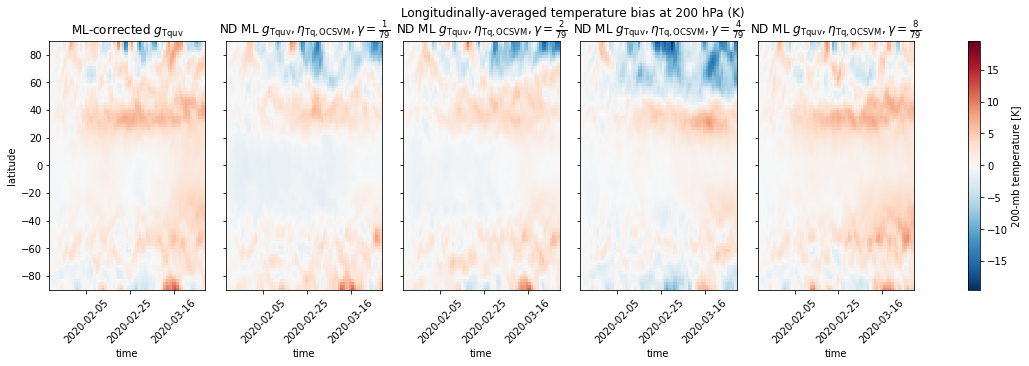

In [19]:
im = explosion_ds.sel(time=time_sl).plot(col = "run", x = "time")
for i, title in enumerate(table_run_names.values()):
    im.axes[0][i].set_title(title)
    im.axes[0][i].tick_params(axis='x', labelrotation = 45)
im.fig.set_size_inches(16, 5)
im.fig.suptitle("Longitudinally-averaged temperature bias at 200 hPa (K)")
plt.show()

In [20]:
explosion_novelty_ds = xr.concat(
    [diags_complete[name].is_novelty_zonal_mean_value if name not in [ML_ONLY_ALG]
    else 0 * diags_complete[name].tmp200_zonal_mean_bias
    for name in table_run_names],
    dim=pd.Index(table_run_names.values(), name="run"),
)

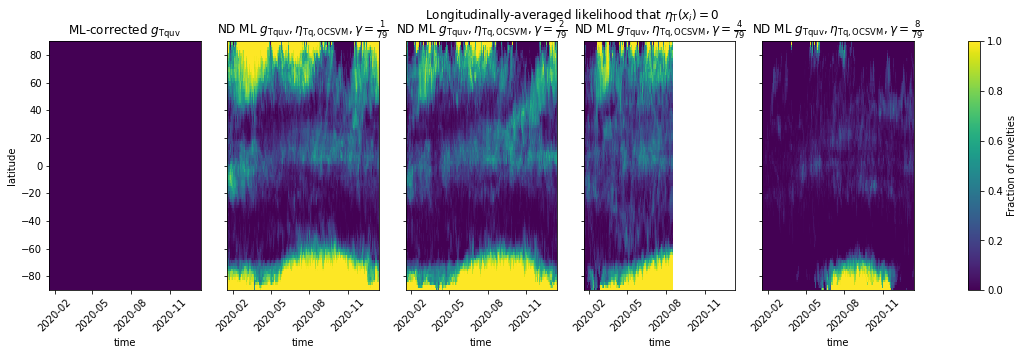

In [21]:
im = explosion_novelty_ds.plot(col = "run", x="time")
for i, title in enumerate(table_run_names.values()):
    im.axes[0][i].set_title(title)
    im.axes[0][i].tick_params(axis='x', labelrotation = 45)
im.fig.set_size_inches(16, 5)
im.fig.suptitle(r"Longitudinally-averaged likelihood that $\eta_{\mathrm{T}}(x_i) = 0$")
im.cbar.set_label("Fraction of novelties")
plt.show()

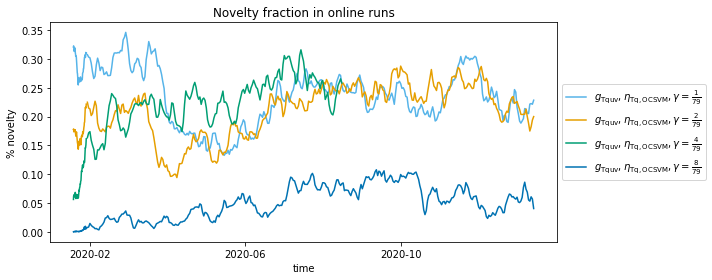

In [23]:
plt.figure(figsize=(10, 4), tight_layout=True)
for name, label in per_nov_names.items():
    if name != ML_ONLY_ALG:
        diags_complete[name].is_novelty_spatial_mean_global.plot(label=label)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Novelty fraction in online runs")
plt.ylabel("% novelty")
plt.show()